# Regresión Logística

En este _Notebook_ vamos a aprender a utilizar el modelo de Regresión Logística de Scikit Learn. Vamos a usar un set de datos donde vamos a predecir si su sabor de helado preferido es chocolate (1) o no (0), en base al genero (female), un puntaje de un test de videojuegos (video) y un puntaje en un test de puzzles. 


In [1]:
import pandas as pd
helados = pd.read_csv('Ice_cream.csv')
helados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   id          200 non-null    int64
 2   female      200 non-null    int64
 3   ice_cream   200 non-null    int64
 4   video       200 non-null    int64
 5   puzzle      200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


Ahora vamos a importar el modelo y lo vamos a entrenar. Vamos a partir por una regresión logística usando solo las variables puzzle y videos (no el género).

In [2]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(helados[['video','puzzle']], helados['ice_cream'])

LogisticRegression()

Lo primero que haremos será graficar ambas _features_ en un plano 2D. Para esto, en vez de usar `matplotlib` vamos a usar `seaborn`. `seaborn` es una librería para realizar visualiaciones que utilza a `matplotlib` por debajo, pero tiene la ventaja de trabajar nativamente con DataFrames, por lo que podemos hacer hartas cosas de forma mucho más fácil. 

<Axes: xlabel='video', ylabel='puzzle'>

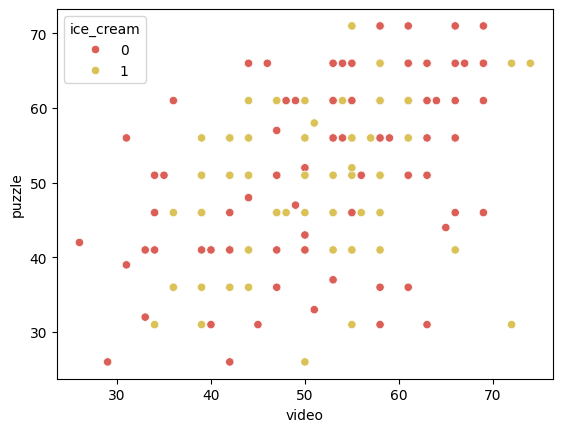

In [4]:
import seaborn as sns

# Tomamos una paleta de 8 colores
palette = sns.color_palette("hls", 8)

# Pasamos el DataFrame, indicamos que queremos en cada eje, y la forma de pintar los puntos
# Los colores son los dos primeros dos de la paleta
sns.scatterplot(data=helados, x="video", y="puzzle", hue="ice_cream", palette=palette[0:2])

Se ve que no nos va a ir muy bien con la regresión, pero eso no significa que no lo podamos intentar! Ahora vamos a utilizar `log_reg` para predecir sobre todos los puntos del plano. Luego vamos a pintar la frontera de decisión.

/Users/juan/downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/juan/downloads/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


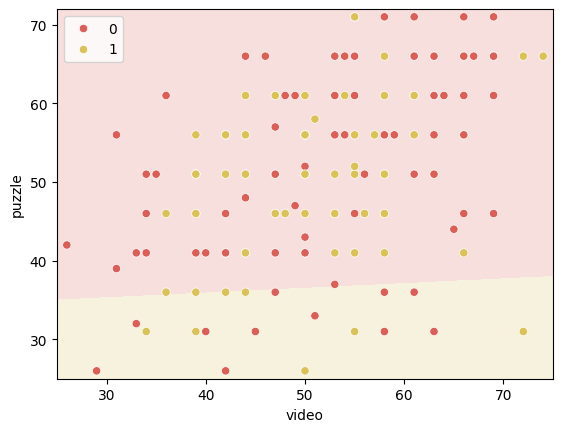

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:2])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = helados.video.min() - 1, helados.video.max() + 1
y_min, y_max = helados.puzzle.min() - 1, helados.puzzle.max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Generamos las predicciones
predictions = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('video')
plt.ylabel('puzzle')

sns.scatterplot(data=helados, x="video", y="puzzle", hue="ice_cream", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Notemos que el _scatter plot_ está hecho en `seaborn`, pero lo demás son funciones de `matplotlib`. Uno de los 
beneficios de `seaborn`, es que al estar hecho sobre `matplotlib`, podemos mezclar código de ambas librerías. Ahora hagamos un segundo gráfico que nos muestra cuan seguro está nuestro modelo sobre su respuesta.

/Users/juan/downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/juan/downloads/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


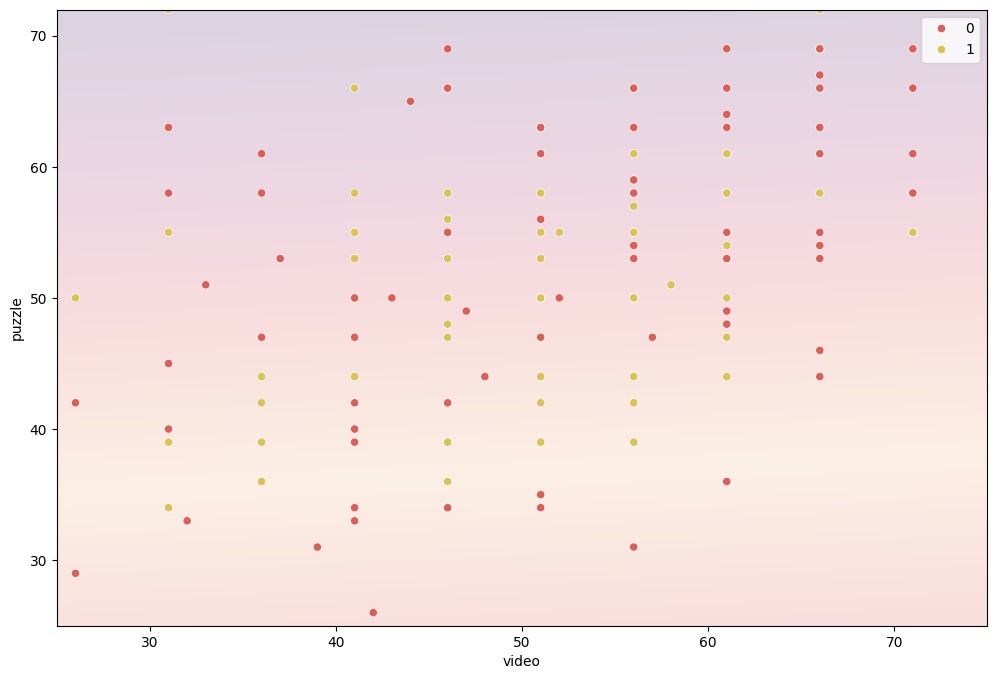

In [6]:
# Ajustamos el tamaño
plt.rcParams["figure.figsize"]=(12, 8)

pallete_back = sns.color_palette("flare", as_cmap=True)

proba = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])

scores = np.array([max(i) for i in proba])

# Resultado de la frontera de decisión con color claro
Z = scores.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=pallete_back, shading='auto', alpha=0.2)
plt.xlabel('video')
plt.ylabel('puzzle')

sns.scatterplot(data=helados, x="puzzle", y="video", hue="ice_cream", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Aquí podemos ver que mientras más cerca de la frontera, más dudas tiene el modelo de su decisión.

Y como comparar esto con un modelo que usa además el género? 
La métrica de MSE o r^2 no funciona bien, dado que el y siempre va a ser 0 o 1. Una mejor métrica es el log-loss o cross-entropy, que es el promedio de la verosimilitud individual de cada punto. Se multiplica por -1 para que menos sea mejor, igual que el MSE. 

In [7]:
from sklearn.metrics import log_loss

predictions = log_reg.predict(helados[['video','puzzle']])
log_loss(helados['ice_cream'],predictions)

17.841608427612986

In [8]:
log_reg_completa = LogisticRegression()
log_reg_completa.fit(helados[['female','video','puzzle']], helados['ice_cream'])

predictions = log_reg_completa.predict(helados[['female','video','puzzle']])
log_loss(helados['ice_cream'],predictions)

16.03942575815713